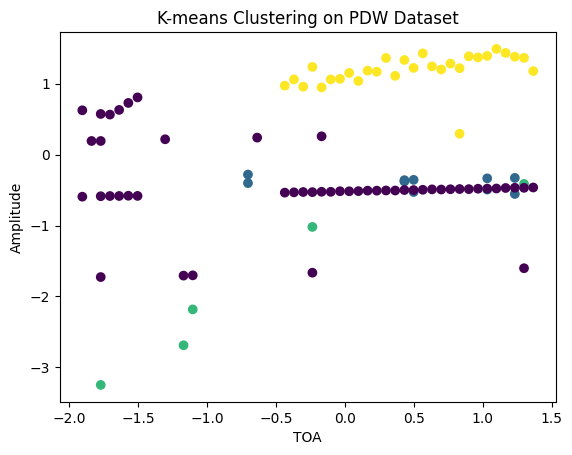

K-means clustering complete. Clustered data saved to 'clustered_pdw_data.csv'.


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file)
# Assuming the dataset is a CSV file with columns: TOA, Amplitude, Frequency, PulseWidth, AOA
data = pd.read_csv('pdw_output.csv')

# Extract features from the dataset
features = ['TOA', 'Amplitude', 'Frequency', 'PulseWidth', 'AOA']
X = data[features]

# Normalize the features (important for K-means to work well)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change n_clusters to the desired number of clusters
kmeans.fit(X_scaled)

# Get the cluster labels
data['Cluster'] = kmeans.labels_

# Visualize the clusters (if needed, only 2D or 3D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('TOA')
plt.ylabel('Amplitude')
plt.title('K-means Clustering on PDW Dataset')
plt.show()

# Save the clustered data
data.to_csv('clustered_pdw_data.csv', index=False)

print("K-means clustering complete. Clustered data saved to 'clustered_pdw_data.csv'.")


Accuracy: 1.0
Confusion Matrix:
[[68  0]
 [ 0 10]]


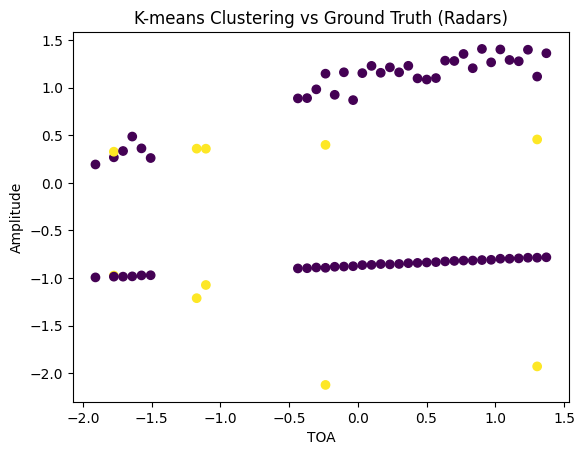

Cluster comparison with ground truth complete. Results saved to 'clustered_pdw_data_with_comparison.csv'.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file)
# Assuming the dataset has columns: TOA, Amplitude, Frequency, PulseWidth, AOA, and RadarLabel
data = pd.read_csv('pdw_output.csv')
# Extract features from the dataset
features = ['TOA', 'Amplitude', 'Frequency', 'PulseWidth', 'AOA']
X = data[features]

# Ground truth labels (Radar1, Radar2)
y_true = data['RadarID']  # Replace with the actual name of the ground truth column

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Set n_clusters to 2 for Radar1 and Radar2
kmeans.fit(X_scaled)

# Get the cluster labels
data['Cluster'] = kmeans.labels_

# Map cluster labels to ground truth for comparison (This step can vary based on label order)
# You can reorder cluster labels manually if required based on inspection
data['Cluster'] = data['Cluster'].replace({0: 'Radar1', 1: 'Radar2'})  # Or reverse based on your case

# Compare clusters with the ground truth
accuracy = accuracy_score(y_true, data['Cluster'])
conf_matrix = confusion_matrix(y_true, data['Cluster'])

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the clusters (2D visualization using first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'].apply(lambda x: 0 if x == 'Radar1' else 1), cmap='viridis')
plt.xlabel('TOA')
plt.ylabel('Amplitude')
plt.title('K-means Clustering vs Ground Truth (Radars)')
plt.show()

# Save the clustered data
data.to_csv('clustered_pdw_data_with_comparison.csv', index=False)

print("Cluster comparison with ground truth complete. Results saved to 'clustered_pdw_data_with_comparison.csv'.")


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file)
# Assuming the dataset has columns: TOA, Amplitude, Frequency, PulseWidth, AOA, and RadarLabel
data = pd.read_csv('pdw_output.csv')

# Extract features from the dataset
features = ['TOA', 'Amplitude', 'Frequency', 'PulseWidth', 'AOA']
X = data[features]

# Ground truth labels (Radar1, Radar2)
y_true = data['RadarID']  # Replace with the actual name of the ground truth column

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples based on your dataset
dbscan.fit(X_scaled)

# Get the cluster labels (-1 indicates noise points that don't belong to any cluster)
data['Cluster'] = dbscan.labels_

# Filter out noise points if you don't want them to affect the comparison
# Only keep points that are assigned to a valid cluster (not noise)
non_noise_data = data[data['Cluster'] != -1]

# Map cluster labels to ground truth for comparison
# You may need to reorder the clusters to align with Radar1, Radar2 manually
non_noise_data['Cluster'] = non_noise_data['Cluster'].replace({0: 'Radar1', 1: 'Radar2'})  # Adjust if needed

# Compare clusters with the ground truth (for non-noise data)
y_true_filtered = non_noise_data['RadarID']
cluster_filtered = non_noise_data['Cluster']

accuracy = accuracy_score(y_true_filtered, cluster_filtered)
conf_matrix = confusion_matrix(y_true_filtered, cluster_filtered)

print(f"Accuracy (excluding noise): {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the clusters (2D visualization using first two features, excluding noise points)
plt.scatter(X_scaled[non_noise_data.index, 0], X_scaled[non_noise_data.index, 1],
            c=non_noise_data['Cluster'].apply(lambda x: 0 if x == 'Radar1' else 1), cmap='viridis')
plt.xlabel('TOA')
plt.ylabel('Amplitude')
plt.title('DBSCAN Clustering vs Ground Truth (Radars)')
plt.show()

# Save the clustered data (excluding noise points)
non_noise_data.to_csv('dbscan_clustered_pdw_data_with_comparison.csv', index=False)

print("DBSCAN clustering and ground truth comparison complete. Results saved to 'dbscan_clustered_pdw_data_with_comparison.csv'.")


/tmp/ipykernel_7514/4023464441.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_noise_data['Cluster'] = non_noise_data['Cluster'].replace({0: 'Radar1', 1: 'Radar2'})  # Adjust if needed


TypeError: '<' not supported between instances of 'int' and 'str'